# Graded Assignment 2 (10 points)

##### Ana Chaloska 

# PART 1

BONUS: 
* **tune more parameters of logistic regression** - done
* **add additional classifiers (NN, Naive Bayes, decision tree)** - done
* analyse additional dataset (ex. Iris dataset)

## Design of the experiment

## Implementation of the experiment

In [199]:
%pylab inline
# imports necessary modules
from sklearn.datasets import load_digits
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from itertools import product

# load mnist dataset and split in train and test set.
digits = load_digits()
X_train_mnist = reshape(digits.images[:1500],(1500,64))
X_test_mnist = reshape(digits.images[1500:],(297,64))
Y_train_mnist = digits.target[:1500]
Y_test_mnist = digits.target[1500:]
# your implementation here

Populating the interactive namespace from numpy and matplotlib


In [137]:
# Standardizes the elemetns of the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_mnist = scaler.fit_transform(X_train_mnist, Y_train_mnist)
X_test_mnist = scaler.fit_transform(X_test_mnist, Y_test_mnist)

### KNN 

#### Default KNN

In [286]:
# trains knn with default settings
knn=KNeighborsClassifier()
knn.fit(X_train_mnist, Y_train_mnist)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### Optimized KNN

In [282]:
# Optimizes knn
k_range = list(range(1,11))
cv_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid = dict(n_neighbors=k_range), cv=10, scoring='accuracy')
cv_knn.fit(X_train_mnist, Y_train_mnist)     

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [283]:
opt_knn=KNeighborsClassifier(n_neighbors=3)
opt_knn.fit(X_train_mnist, Y_train_mnist)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### Logistic Regression

#### Default Logistic Regression

In [55]:
# trains logistic regression with default settings
log_reg=LogisticRegression()
log_reg.fit(X_train_mnist, Y_train_mnist)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Optimized Logistic Regression

In [271]:
# Optimizes Logistic Regression
log_reg_params=[0.0001, 0.0005, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]
cv_log_reg = GridSearchCV(estimator=LogisticRegression(), param_grid = dict(C=log_reg_params, fit_intercept=[True, False]), cv=10)
cv_log_reg.fit(X_train_mnist, Y_train_mnist)   

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.0005, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1], 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [270]:
opt_log_reg=LogisticRegression(C=0.3)
opt_log_reg.fit(X_train_mnist, Y_train_mnist)

LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Results and analysis of the experiment

The perfomance of a parametric (logistic regression) and non-parametric (k-nearest neighbours) classifier on part of the MNIST dataset was optimized and compared.

The dataset consists of 1797 examples with 64 features. The logistic regression and the k-nearest neighbours classifier both define 10 classes, 1 for each digit $({0,1,...,9})$. the classes correspond to the *target* attributes of the examples in the datset. 

**Data:** The provided train and test set of MNIST dataset were used to train and test the classifiers. Firstly, the data was pre-processed by standardization, in order to set a mean value of 0 and a standard deviation of 1. (I tried normalization as well, but it led to less accurate predictions than did stndardization). 

**Training phase:** Logistic regression and k-nn were first trained using default parameters (n_neighbors=5 for k-nn and C=1.0 for logistic regression). To optimize the performance of the classifiers, I applied 10-fold cross validation for each of them. The range of values for which the parameter *k-neighbors* was evaluated while optimizing k-nn are the {1,2,3,4,5,6,7,8,9,10}. The range of values for which the regularization parameter *C* was evaluated while optimizing logistic regression are {0.0001, 0.0005, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1}. The range of values for which the regularization parameter *fit_intercept* was evaluated while optimizing logistic regression are {```True```, ```False```}. After that, the value/s of the *best parameter/s* for each of the classifiers was/were found. The classifiers were then trained with the values of their best (optimized) parameters in order to derive optimal classifiers. Below are the results gathered from the experiment.

### KNN

**The optimal value of the parameter *n-neighbors* of k-nn was 1. **

In [284]:
print('The optimal value of k is: ', cv_knn.best_params_)

The optimal value of k is:  {'n_neighbors': 1}


**The average cross-validaiton accuracies and standard deviations of the accuracy for $k\in{1,2,3,4,5,6,7,8,9,10}$ are the following:**

In [114]:
means_cv_knn = cv_knn.cv_results_['mean_test_score']
stds_cv_knn = cv_knn.cv_results_['std_test_score']
for mean, std, params in zip(means_cv_knn, stds_cv_knn, cv_knn.cv_results_['params']):
    print("MEAN: %0.3f | STD:(+/-%0.03f) | for %r" % (mean, std * 2, params))
print()

MEAN: 0.960 | STD:(+/-0.043) | for {'n_neighbors': 1}
MEAN: 0.951 | STD:(+/-0.043) | for {'n_neighbors': 2}
MEAN: 0.961 | STD:(+/-0.045) | for {'n_neighbors': 3}
MEAN: 0.960 | STD:(+/-0.049) | for {'n_neighbors': 4}
MEAN: 0.961 | STD:(+/-0.053) | for {'n_neighbors': 5}
MEAN: 0.951 | STD:(+/-0.049) | for {'n_neighbors': 6}
MEAN: 0.952 | STD:(+/-0.064) | for {'n_neighbors': 7}
MEAN: 0.948 | STD:(+/-0.061) | for {'n_neighbors': 8}
MEAN: 0.951 | STD:(+/-0.064) | for {'n_neighbors': 9}
MEAN: 0.944 | STD:(+/-0.066) | for {'n_neighbors': 10}



**The average accuracies for $k\in{1,2,3,4,5,6,7,8,9,10}$ are plotted below (Figure 1). The plot approves that the best accuracy was reached for $k=1$.** 

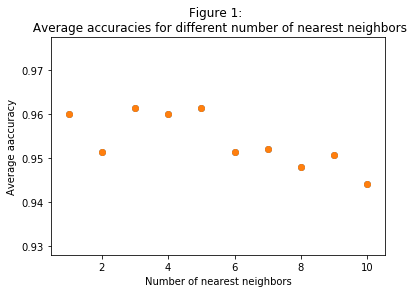

In [321]:
plt.scatter(k_range, means_cv_knn)
plt.scatter(k_range, means_cv_knn)
plt.title('Figure 1: \n Average accuracies for different number of nearest neighbors')
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Average aaccuracy')

**The standard deviations of the accuracies for $k\in{1,2,3,4,5,6,7,8,9,10}$ are plotted the below (Figure 2).**

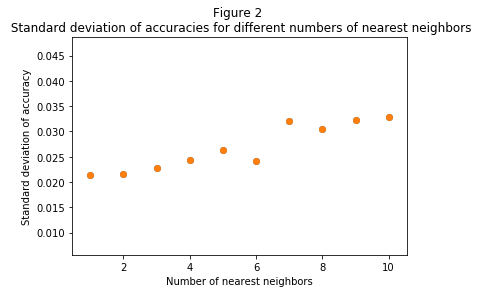

In [322]:
plt.scatter(k_range, stds_cv_knn)
plt.scatter(k_range, stds_cv_knn)
plt.title('Figure 2 \n Standard deviation of accuracies for different numbers of nearest neighbors')
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Standard deviation of accuracy')

**Below are the accuracy scores obtained for the default and the optimized version of the k-nn classifier. (Of course, the accuracy on the test set is always slightly lower than the one on the train set. I printed all of them to show this occurance.)**

In [294]:
print('knn (no cv): TRAIN ',knn.score(X_train_mnist, Y_train_mnist))
print('knn (no cv): TEST ',knn.score(X_test_mnist, Y_test_mnist))
print('knn: TRAIN', average(cross_val_score(knn, X_train_mnist, Y_train_mnist, cv=10)))
print('knn: TEST', average(cross_val_score(knn, X_test_mnist, Y_test_mnist, cv=10)))
print('opt_knn: TRAIN', average(cross_val_score(opt_knn, X_train_mnist, Y_train_mnist, cv=10)))
print('opt_knn: TEST', average(cross_val_score(opt_knn, X_test_mnist, Y_test_mnist, cv=10)))

knn (no cv): TEST  0.956228956229
knn (no cv): TRAIN  0.991333333333
knn: TRAIN 0.969568068457
knn: TEST 0.948066688389
opt_knn: TRAIN 0.974844633248
opt_knn: TEST 0.957763658086


**It is observable that the accuracy score is (slightly) improved after optimizing the parameter of the classifier. Thus opt_knn is the better performing one.**

#### Accuracy of  k-nn
| Classifier    | Average Score |
|:---          |:---:          |
| Default KNN   | 0.956228956229|
| Optimized KNN | 0.957763658086|

**Below is the classification report of the better performing classifier for k-nn classification, namely opt_knn. :**
* **The average precision is 0.96, meaning that of all predictions, 96% of them were correct; **
* **The average recall is 0.96, meaning that the classifier correctly classifies 96% of the instances;**
* **The average f1-score is 0.96, which is significantly high.**

**The metrices in the classification report match the best score (0.957763658086) of opt_knn classifier, presented in the table above.**

In [266]:
print(classification_report(Y_test_mnist, opt_knn.predict(X_test_mnist)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.94      1.00      0.97        31
          2       0.96      1.00      0.98        27
          3       0.96      0.87      0.91        30
          4       1.00      0.91      0.95        33
          5       0.91      1.00      0.95        30
          6       1.00      1.00      1.00        30
          7       0.94      1.00      0.97        30
          8       0.93      0.93      0.93        28
          9       0.97      0.90      0.93        31

avg / total       0.96      0.96      0.96       297



### Logistic Regression

**The optimal value of the regularizationparameter *C* of logistic regression was 0.1. **

**BONUS: The optimal value of the regularizationparameter *fit_intercept* of logistic regression was ```True``` **

In [306]:
print('The optimmal value of the parameters C and fit_intercept: ', cv_log_reg.best_params_)

The optimmal value of the parameters C and fit_intercept:  {'C': 0.1, 'fit_intercept': True}


**The average cross-validaiton accuracies and standard deviations of the accuracy for $C\in{0.0001, 0.0005, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1}$ and $fit intercept\in{True, False}$ are the following:**

In [204]:
means_cv_log_reg = cv_log_reg.cv_results_['mean_test_score']
stds_cv_log_reg = cv_log_reg.cv_results_['std_test_score']
for mean, std, params in zip(means_cv_log_reg, stds_cv_log_reg, cv_log_reg.cv_results_['params']):
    print("MEAN: %0.3f | STD:(+/-%0.03f) | for %r" % (mean, std * 2, params))
print()

MEAN: 0.911 | STD:(+/-0.061) | for {'C': 0.0001, 'fit_intercept': True}
MEAN: 0.911 | STD:(+/-0.061) | for {'C': 0.0001, 'fit_intercept': False}
MEAN: 0.939 | STD:(+/-0.058) | for {'C': 0.0005, 'fit_intercept': True}
MEAN: 0.938 | STD:(+/-0.060) | for {'C': 0.0005, 'fit_intercept': False}
MEAN: 0.943 | STD:(+/-0.055) | for {'C': 0.001, 'fit_intercept': True}
MEAN: 0.943 | STD:(+/-0.055) | for {'C': 0.001, 'fit_intercept': False}
MEAN: 0.947 | STD:(+/-0.050) | for {'C': 0.003, 'fit_intercept': True}
MEAN: 0.947 | STD:(+/-0.050) | for {'C': 0.003, 'fit_intercept': False}
MEAN: 0.951 | STD:(+/-0.043) | for {'C': 0.01, 'fit_intercept': True}
MEAN: 0.951 | STD:(+/-0.043) | for {'C': 0.01, 'fit_intercept': False}
MEAN: 0.951 | STD:(+/-0.039) | for {'C': 0.03, 'fit_intercept': True}
MEAN: 0.951 | STD:(+/-0.039) | for {'C': 0.03, 'fit_intercept': False}
MEAN: 0.953 | STD:(+/-0.036) | for {'C': 0.1, 'fit_intercept': True}
MEAN: 0.953 | STD:(+/-0.036) | for {'C': 0.1, 'fit_intercept': False}
MEA

**The average accuracies for $C\in{0.0001, 0.0005, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1}$ and $fit intercept\in{True, False}$ are plotted below (Figure 3). The scatterplot approves that the best accuracy was reached for $C=0.1$ because the accuracy is the highest for that value. Besides, the scatterplot approves that ```True``` is a better value for the parameter best_intercept (orange) than ```False``` (blue) - orange points reach higher values of accuracy than the blue ones.**

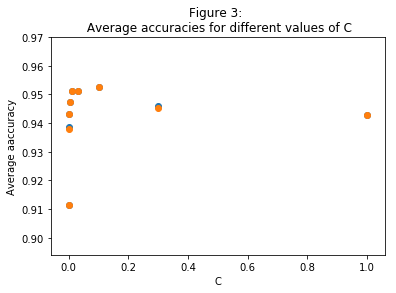

In [323]:
plt.scatter(log_reg_params, means_cv_log_reg[::2])
plt.scatter(log_reg_params, means_cv_log_reg[1::2])
plt.title('Figure 3: \n Average accuracies for different values of C')
plt.xlabel('C')
plt.ylabel('Average aaccuracy')

**The standard deviations of the accuracies for $C\in{0.0001, 0.0005, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1}$ and $fit intercept\in{True, False}$ are plotted the below (Figure 4). (orange color is used for fit_parameter=```True``` and blue for fit_parameter=```False```, but since a lot of points are almost overlapping, the blue ones are not very noticable)**

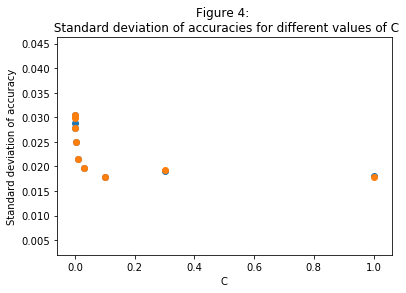

In [324]:
plt.scatter(log_reg_params, stds_cv_log_reg[::2])
plt.scatter(log_reg_params, stds_cv_log_reg[1::2])
plt.title('Figure 4: \n Standard deviation of accuracies for different values of C')
plt.xlabel('C')
plt.ylabel('Standard deviation of accuracy')

**Below are the accuracy scores obtained for the default and the optimized version of the logistic regression classifier. (Of course, the accuracy on the test set is always slightly lower than the one on the train set. I printed all of them to show this occurance.)**

In [305]:
print('log_reg (no cv): TRAIN ',log_reg.score(X_train_mnist, Y_train_mnist))
print('log_reg (no cv): TEST ',log_reg.score(X_test_mnist, Y_test_mnist))
print('opt_log_reg: TRAIN', average(cross_val_score(opt_log_reg, X_train_mnist, Y_train_mnist, cv=10)))
print('opt_log_reg: TEST', average(cross_val_score(opt_log_reg, X_test_mnist, Y_test_mnist, cv=10)))

log_reg (no cv): TRAIN  0.89
log_reg (no cv): TEST  0.804713804714
opt_log_reg: TRAIN 0.946215275337
opt_log_reg: TEST 0.921381092026


**It is observable that the accuracy score is significantly improved after optimizing the parameter of the classifier. Thus opt_log_reg is the better performing one.**

#### Accuracy of logistic regression
| Classifier    | Average Score |
|:---          |:---:          |
| Default Logistic Regression   | 0.804713804714|
| Optimized Logistic Regression | 0.921381092026|

**Below is the classification report of the better performing classifier for logistic regression classification, namely opt_log_reg. :**
* **The average precision is 0.89, meaning that of all predictions, 89% of them were correct; **
* **The average recall is 0.89, meaning that the classifier correctly classifies 89% of the instances;**
* **The average f1-score is 0.89, which is significantly high.**

**The metrices in the classification report match the best score of the classifier, presented in the table above.**

In [236]:
print(classification_report(Y_test_mnist, opt_log_reg.predict(X_test_mnist)))

             precision    recall  f1-score   support

          0       1.00      0.93      0.96        27
          1       0.76      0.84      0.80        31
          2       1.00      1.00      1.00        27
          3       0.83      0.63      0.72        30
          4       0.97      0.91      0.94        33
          5       0.90      0.93      0.92        30
          6       0.97      1.00      0.98        30
          7       0.90      0.90      0.90        30
          8       0.72      0.93      0.81        28
          9       0.90      0.84      0.87        31

avg / total       0.89      0.89      0.89       297



### Comparison

**Below is the confusion matrix of the better performing classifier for k-nn classification, namely opt_knn. The values along the diagonal of the matrix are much higher than the rest of the values in the matrix. Besides, the rest of the values are mostly zeroes, except for 7 ones. That shows that the classifier has a very hgih accuracy, and it only misclassifies a small portion of the test dataset.**

In [311]:
print(confusion_matrix(Y_test_mnist, opt_knn.predict(X_test_mnist)))

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  1 26  0  1  0  1  1  0]
 [ 0  0  0  0 30  0  0  1  1  1]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  2  0  0  0  0  0  0 26  0]
 [ 0  0  0  1  0  2  0  0  0 28]]


**Below is the confusion matrix of the better performing classifier for logistic regression classification, namely opt_log_reg. The values along the diagonal of the matrix are much higher than the rest of the values in the matrix. Besides, the rest of the values are mostly zeroes, except for 5 ones, 2 twos, 2 threes and 1 five. That shows that the classifier has a relatively hgih accuracy, but it still misclassifies some test instances.**

In [310]:
print(confusion_matrix(Y_test_mnist, opt_log_reg.predict(X_test_mnist)))

[[25  0  0  0  1  0  1  0  0  0]
 [ 0 26  0  2  0  0  0  0  3  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  1  0 19  0  3  0  2  5  0]
 [ 0  0  0  0 30  0  0  0  0  3]
 [ 0  2  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  1  0  0  0  0  0 27  2  0]
 [ 0  2  0  0  0  0  0  0 26  0]
 [ 0  2  0  2  0  0  0  1  0 26]]


**By looking at the two matrices, we could notice that most of the values in the diagonal of the 1st matrix are bigger than or equal to the values in the diagonal of the 2nd matrix. Since the values in the diagonal are the number of true positives for each class, this leads to the conclusion that opt_knn is a better classifer than opt_log_reg. Moreover, by looking at the rest of the values (with same idices) in the matrices, we could notice that the ones in the 2nd matrix are relatively higher than the ones in the 1st one. Since these numbers represent the false positives, this again shows that opt_knn is a better classifier than opt_log_reg. **

**Indeed, if we look at the accuracy scores (in the table below), we could cderive the same conclusion because $0.957763658086>0.921381092026$.**

| Classifier    | Average Score |
|:---          |:---:          |
| Optimized k-nn  | 0.957763658086|
| Optimized Logistic Regression | 0.921381092026|

## Bonus: Decision Tree (training and results)

**Training phase similar as the one described in the previous section was applied to optimize the performance of Decision Tree Classifier. The range of values for which the parameter presort was evaluated while optimiming decision tree are the {```True```, ```False```}. **

In [252]:
# trains decition tree with default settings
dt=DecisionTreeClassifier()
dt.fit(X_train_mnist, Y_train_mnist)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [253]:
# Optimizes decision tree
dt_params=[True, False]
cv_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid = dict(presort=[True, False]), cv=10)
cv_dt.fit(X_train_mnist, Y_train_mnist)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'presort': [True, False]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [312]:
opt_dt=DecisionTreeClassifier(presort=False)
opt_dt.fit(X_train_mnist, Y_train_mnist)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

**The optimal value of the parameter *presort* of k-nn was ```False```. **

In [317]:
print('The optimmal value of the parameter presort: ', cv_dt.best_params_)

The optimmal value of the parameter presort:  {'presort': False}


**The average cross-validaiton accuracies and standard deviations of the accuracy for $presort\in{True, False}$ are the following:**

In [257]:
means_cv_dt = cv_dt.cv_results_['mean_test_score']
stds_cv_dt = cv_dt.cv_results_['std_test_score']
for mean, std, params in zip(means_cv_dt, stds_cv_dt, cv_dt.cv_results_['params']):
    print("MEAN: %0.3f | STD:(+/-%0.03f) | for %r" % (mean, std * 2, params))
print()

MEAN: 0.824 | STD:(+/-0.113) | for {'presort': True}
MEAN: 0.827 | STD:(+/-0.095) | for {'presort': False}



**The average accuracies for $presort\in{True, False}$ are plotted below (Figure 5). The scatterplot approves that the best accuracy was reached for $presort=False$ because for this value the accuracy is the highest. (In the plot, 0=False and 1=True)**

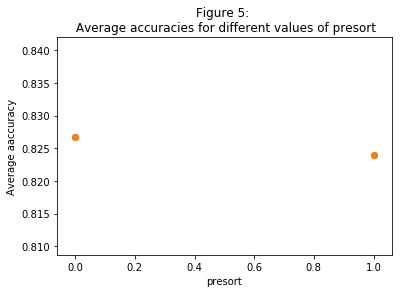

In [325]:
plt.scatter(dt_params, means_cv_dt)
plt.scatter(dt_params, means_cv_dt)
plt.title('Figure 5: \n Average accuracies for different values of presort')
plt.xlabel('presort')
plt.ylabel('Average aaccuracy')

**The standard deviations of the accuracies for $presort\in{True, False}$ are plotted the below (Figure 6).**

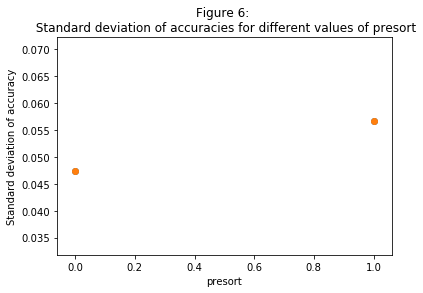

In [326]:
plt.scatter(dt_params, stds_cv_dt)
plt.scatter(dt_params, stds_cv_dt)
plt.title('Figure 6: \n Standard deviation of accuracies for different values of presort')
plt.xlabel('presort')
plt.ylabel('Standard deviation of accuracy')

**Below are the accuracy scores obtained for the default and the optimized version of the decision tree classifier. (Of course, the accuracy on the test set is always slightly lower than the one on the train set. I printed all of them to show this occurance.)**

In [320]:
print('dt (no cv): TRAIN ',dt.score(X_train_mnist, Y_train_mnist))
print('dt (no cv): TEST ',dt.score(X_test_mnist, Y_test_mnist))
print('dt: TRAIN', average(cross_val_score(dt, X_train_mnist, Y_train_mnist, cv=10)))
print('dt: TEST', average(cross_val_score(dt, X_test_mnist, Y_test_mnist, cv=10)))
print('opt_dt: TRAIN', average(cross_val_score(opt_dt, X_train_mnist, Y_train_mnist, cv=10)))
print('opt_dt: TEST', average(cross_val_score(opt_dt, X_test_mnist, Y_test_mnist, cv=10)))

dt (no cv): TRAIN  1.0
dt (no cv): TEST  0.771043771044
dt: TRAIN 0.83100003361
dt: TEST 0.792568387407
opt_dt: TRAIN 0.830975936124
opt_dt: TEST 0.770518627132


#### Accuracy of decision tree
| Classifier    | Average Score |
|:---          |:---:          |
| Default Decision Tree   | 0.771043771044|
| Optimized Tree | 0.770518627132|

**Below is the classification report of the better performing classifier for decision tree classification, namely opt_dt. :**
* **The average precision is 0.77, meaning that of all predictions, 77% of them were correct; **
* **The average recall is 0.76, meaning that the classifier correctly classifies 76% of the instances;**
* **The average f1-score is 0.76, which is not relatively high.**

**The metrices in the classification report match the best score of the classifier, presented in the table above.**

In [296]:
print(classification_report(Y_test_mnist, opt_dt.predict(X_test_mnist)))

             precision    recall  f1-score   support

          0       0.96      0.93      0.94        27
          1       0.72      0.58      0.64        31
          2       0.77      0.74      0.75        27
          3       0.73      0.53      0.62        30
          4       0.71      0.88      0.78        33
          5       0.93      0.83      0.88        30
          6       0.93      0.83      0.88        30
          7       0.70      0.87      0.78        30
          8       0.53      0.64      0.58        28
          9       0.72      0.74      0.73        31

avg / total       0.77      0.76      0.76       297



**Below is the confusion matrix of the better performing classifier for decision tree classification, namely opt_log_reg. The values along the diagonal of the matrix are higher than the rest of the values in the matrix. However, there are a lot of values in the matrix (among the the values NOT in the deagonal) which are not zeros. This indicates that the classifier doesn't make very reliable predictions, and thus is not the best choice for this dataset.**

In [261]:
print(confusion_matrix(Y_test_mnist, opt_dt.predict(X_test_mnist)))

[[25  0  0  0  1  0  0  1  0  0]
 [ 0 20  3  1  1  0  0  0  5  1]
 [ 1  0 21  2  0  0  0  1  2  0]
 [ 0  1  1 16  0  3  1  4  4  0]
 [ 0  0  0  0 30  0  0  2  0  1]
 [ 0  0  0  1  0 27  1  0  0  1]
 [ 0  0  1  0  1  1 25  0  2  0]
 [ 0  0  0  3  0  1  0 25  0  1]
 [ 0  3  1  2  1  0  0  1 17  3]
 [ 0  2  0  1  0  1  0  4  0 23]]


**Indeed, by comparing the classification accuracy of the optimized decision tree classifier to the optimized k-nn and optimized logistic regression, we can obverve that it is the classifier with poorest performance among the three of them. (Look at the table below)**

| Classifier    | Average Score |
|:---          |:---:          |
| Optimized k-nn  | 0.957763658086|
| Optimized Logistic Regression  | 0.921381092026|
| Optimized Tree | 0.770518627132|

# PART 2

In [198]:
x1 = [1, 1, 2, 3, 4, 4, 4, 7, 8, 8, 8]
x2 = [3, 6, 6, 5, 1, 3, 6, 7, 6, 7, 3]
y = [0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0] 
X=reshape([item for pair in zip(x1, x2) for item in pair], (11,2))

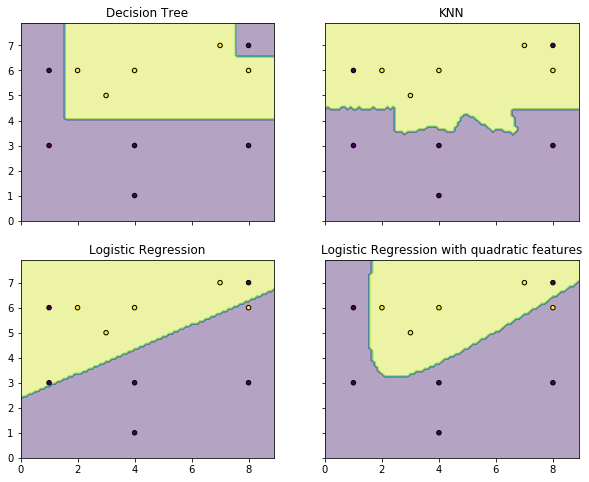

In [200]:
clf1 = DecisionTreeClassifier()
clf2 = KNeighborsClassifier()
clf3 = LogisticRegression()
eclf = make_pipeline(PolynomialFeatures(2), LogisticRegression())

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree', 'KNN',
                         'Logistic Regression', 'Logistic Regression with quadratic features']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

**By observing the plots of the 4 classifiers, it is clear that the Decision Tree classifier has the best performance because it correctly cassifies all of the test instances. KNN and Logistics Regression with quadratic features have a slightly worse performance because each of them misclassifies 2 test instances. Expetedly, the classifier with poorest performance is Logistic Regression, misclassifying even 4 test instances because it is the least flexible one (because of the linearity of its classification boundary). To invent a method that uses multiple learning algorithms and combines the results, I would combine Decision Tree (because it is the best performing one) and KNN (because it misclassified test points of only one class, unlike Logistic Regression which misclassified one yellow and one purple point). That would lead to more reliable results because it would improve the performance of KNN, and at the same time it would decrease the preobability of overfitting at the Decision Tree.**